## Practical Homework 1 - Linear Regression

**Please write your name and student number in the following cell.**

In [1]:
# Student_Name = "Ali GhaemDoust"
# Student_Number = "98108695"

## Phase 0: Intro

For this assignment, you'll be given a dataset containing cars for sale. To study the dataset in more detail, refer to [this](https://www.kaggle.com/datasets/arianghasemi/divar-cars/data) link.

In [2]:
!wget -O /kaggle/working/dataset.csv "https://www.dropbox.com/scl/fi/cwd3e0wo7j41wungb4zat/cars.csv?rlkey=z83jkj9ex2no06z4htf6ce1w5&dl=1"

--2024-03-14 08:32:11--  https://www.dropbox.com/scl/fi/cwd3e0wo7j41wungb4zat/cars.csv?rlkey=z83jkj9ex2no06z4htf6ce1w5&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc502f2bcaf612ad0e4e79b095b.dl.dropboxusercontent.com/cd/0/inline/CPByAf3yjNo7CImYtD_58vFbpOeiEQ4zZRHWnWhdosDs1V8x5v6VDdQ_ujZYTpbv0r6KhKKjasKhCOCd_kIrhRFRMDFNzVJmIURmaNuSpHE8BpBbm_Xay2Qxb2gfpC1cXdg-0F6Pq90_shUlNhoOF-LB/file?dl=1# [following]
--2024-03-14 08:32:12--  https://ucc502f2bcaf612ad0e4e79b095b.dl.dropboxusercontent.com/cd/0/inline/CPByAf3yjNo7CImYtD_58vFbpOeiEQ4zZRHWnWhdosDs1V8x5v6VDdQ_ujZYTpbv0r6KhKKjasKhCOCd_kIrhRFRMDFNzVJmIURmaNuSpHE8BpBbm_Xay2Qxb2gfpC1cXdg-0F6Pq90_shUlNhoOF-LB/file?dl=1
Resolving ucc502f2bcaf612ad0e4e79b095b.dl.dropboxusercontent.com (ucc502f2bcaf612ad0e4e79b095b.dl.dropboxusercontent.com)... 162.12

In [3]:
# Warning! You are not permitted to import any other libraries

import os
import pandas
import sklearn
import numpy as np
import pandas as pd

from tqdm import tqdm

import seaborn as sns
from joblib import dump, load
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Phase 1: Load Data (P1: 2 points)

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe. **(P1-1: 1 points)**

In [4]:
file_path = '/kaggle/working/dataset.csv'
df = pd.read_csv(file_path)
df.head()

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location
0,Tehran,۱۳۷۶,نقره ای,۵۳۲,نیسان، پاترول 4 در، 6 سیلندر,تمام رنگ,235000000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,آجودانیه
1,Tehran,۱۳۹۲,سفید,۱۵۰٬۰۰۰,CNG ،پیکان، وانت,خط و خش جزیی,110000000.0,NaN,NaN,NaN,NaN,NaN,2022-03-12,بلوار کشاورز
2,Tehran,۱۳۹۹,سفید,۰,SE ،131 ،پراید,سالم و بی خط و خش,NaN,NaN,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد
3,Tehran,۱۳۹۶,سفید,۸۰٬۰۰۰,SE ،132 ،پراید,سالم و بی خط و خش,125500000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,پیروزی
4,Tehran,۱۳۹۳,نقره ای,۸۰٬۰۰۰,پژو، GLX ،405 بنزینی,سالم و بی خط و خش,187000000.0,سالم,سالم و پلمپ,۹ ماه,دنده ای,نقدی,2022-03-26,پیروزی


Drop any row containing null values. **(P1-2: 1 points)**

In [5]:
df = df.dropna(how='any',axis=0)

## Phase 2: Preprocess (P2: 18 points)

Print names of the columns and the number of rows in the dataset. **(P2-1: 1 points)**

In [6]:
print(list(df.columns))
print(len(df.index))

['City', 'Model_Year', 'Color', 'Mileage', 'Brand', 'Body_Condition', 'Price', 'Engine_Condition', 'Chassis_Condition', 'Third_party_insurance', 'Gearbox', 'Selling_Method', 'Time', 'Location']
32725


Drop all rows where "Selling_Method" is not "نقدی", and then drop the columns "Selling_Method", "Time" and "Location". **(P2-2: 1 points)** 

In [7]:
df = df.query('Selling_Method != "نقدی"')
colms = ['Selling_Method', 'Time', 'Location']
df.drop(colms, axis=1, inplace=True)

Retrieve the description of all columns in the dataset. **(P2-3: 1 points)**

In [8]:
df.describe(include = 'all')

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox
count,845,845,845,845,845,845,8.450000e+02,845,845,845,845
unique,4,57,32,271,296,23,NaN,3,3,12,2
top,Tehran,۱۴۰۰,سفید,۰,SE ،131 ،پراید,سالم و بی خط و خش,NaN,سالم,سالم و پلمپ,۱۲ ماه,دنده ای
freq,461,69,386,47,41,422,NaN,826,829,167,627
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.353680e+08,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5.115031e+08,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.850000e+07,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+08,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.900000e+08,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.500000e+08,NaN,NaN,NaN,NaN


**We need to perform some operations on certain columns to make the entire dataset suitable for a Linear Regression task.**

Change the 'Model_Year' type to numerical. Convert all years written in the Gregorian format to the Solar format. Then, take 1365 as the start year and count the number of years passed since 1365. For example, the year 1399 must be substituted with 34, and the cars tagged with 'قبل از ۱۳۶۶' must be substituted with 0. **(P2-4: 3 points)**

In [9]:
def change_to_solar(date):
    try:
        date = int(date)
        if date > 1500:
            date = date - 621
        if date != 0:
            date = date - 1365
    except:
        date = 0
    return date
    pass

df['Model_Year'] = df['Model_Year'].apply(change_to_solar)

Change the types of 'Mileage' and 'Third_party_insurance' to numerical. **(P2-5: 1 points)**

In [10]:
def convert_Mileage_to_numerical(data):
    try:
        p1, p2 = data.split('٬')
        data = int(p1+p2)
    except:
        data = int(data)
    return data
def convert_TPI_to_numerical(data):
    data = int(data.split()[0])
    return data
        
df['Mileage'] = df['Mileage'].apply(convert_Mileage_to_numerical)
df['Third_party_insurance'] = df['Third_party_insurance'].apply(convert_TPI_to_numerical)

For 'Engine_Condition', map 'سالم' to 2, 'تعویض شده' to 1, and 'نیاز به تعمیر' to 0. **(P2-6: 2 points)**

In [11]:
ENGINE_WORKING = "سالم"
ENGINE_SUBSTITUTED = "تعویض شده"
ENGINE_NEEDS_TO_BE_FIXED = "نیاز به تعمیر"
engine_condition_map = {
    ENGINE_WORKING: 2,
    ENGINE_SUBSTITUTED: 1,
    ENGINE_NEEDS_TO_BE_FIXED: 0
}

df["Engine_Condition"] = df["Engine_Condition"].map(engine_condition_map)

For 'Chassis_Condition', map 'سالم و پلمپ' to 2, 'ضربه خورده' to 1, and 'رنگ شده' to 0. **(P2-7: 1 points)**

In [12]:
CHASSIS_WORKING = "سالم و پلمپ"
CHASSIS_SUBSTITUTED = "ضربه خورده"
CHASSIS_NEEDS_TO_BE_FIXED = "رنگ شده"
chassis_condition_map = {
    CHASSIS_WORKING: 2,
    CHASSIS_SUBSTITUTED: 1,
    CHASSIS_NEEDS_TO_BE_FIXED: 0
}

df["Chassis_Condition"] = df["Chassis_Condition"].map(chassis_condition_map)
df.head()

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox
51,Tehran,26,سفید,135000,رنو، تندر E2 ،90 بنزینی,سالم و بی خط و خش,2.400000e+08,2,2,2,دنده ای
80,Tehran,34,سفید,23000,SE ،131 ،پراید,سالم و بی خط و خش,1.535000e+08,2,2,8,دنده ای
140,Tehran,29,سفید,87000,ix 45، 2400cc هیوندای، سانتافه,رنگ شدگی در ۲ ناحیه,1.290000e+09,2,2,6,اتوماتیک
321,Tehran,29,سفید,80000,تیبا، صندوق دار، SX دوگانه سوز,سالم و بی خط و خش,1.470000e+08,2,2,6,دنده ای
373,Tehran,20,سفید,226000,هیوندای، آوانته، اتوماتیک,خط و خش جزیی,3.400000e+08,2,2,10,اتوماتیک


For 'Gearbox', map 'دنده ای' to 0 and 'اتوماتیک' to 1. **(P2-8: 1 points)**

In [13]:
GEARBOX_MANUAL = "دنده ای"
GEARBOX_AUTO = "اتوماتیک"
gearbox_map = {
    GEARBOX_AUTO: 1,
    GEARBOX_MANUAL: 0
}

df["Gearbox"] = df["Gearbox"].map(gearbox_map)
df.head()

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox
51,Tehran,26,سفید,135000,رنو، تندر E2 ،90 بنزینی,سالم و بی خط و خش,2.400000e+08,2,2,2,0
80,Tehran,34,سفید,23000,SE ،131 ،پراید,سالم و بی خط و خش,1.535000e+08,2,2,8,0
140,Tehran,29,سفید,87000,ix 45، 2400cc هیوندای، سانتافه,رنگ شدگی در ۲ ناحیه,1.290000e+09,2,2,6,1
321,Tehran,29,سفید,80000,تیبا، صندوق دار، SX دوگانه سوز,سالم و بی خط و خش,1.470000e+08,2,2,6,0
373,Tehran,20,سفید,226000,هیوندای، آوانته، اتوماتیک,خط و خش جزیی,3.400000e+08,2,2,10,1


Convert the "City" column into one-hot format. Then drop the "City" column. You will need to create a column for each unique City, and in each row, the column corresponding to its City will be 1, and other columns will be 0. **(P2-9: 2 points)**

In [14]:
cities = df.City.unique()
l = len(df.index)
for city in cities:
    df[city] = [0 for _ in range(l)]
for city in cities:
    df.loc[df.City == city, city] = 1
df.drop('City', axis=1, inplace=True)

Do the same steps for "Color" and "Body_Condition" columns **(P2-10: 2 points)**

In [15]:
colors = df.Color.unique()
l = len(df.index)
for color in colors:
    df[color] = [0 for _ in range(l)]
for color in colors:
    df.loc[df.Color == color, color] = 1
df.drop('Color', axis=1, inplace=True)

In [16]:
body_conditions = df.Body_Condition.unique()
l = len(df.index)
for body_condition in body_conditions:
    df[body_condition] = [0 for _ in range(l)]
for body_condition in body_conditions:
    df.loc[df.Body_Condition == body_condition, body_condition] = 1
df.drop('Body_Condition', axis=1, inplace=True)

Up until now, you have learned how to clean such a dataset. now, let's take other cars aside and focus on the "Pride". drop all the items in the dataframe where the "Brand" does not contain "پراید" and drop the "Brand" column **(P2-11: 3 points)**

In [17]:
df = df[df['Brand'].str.contains('پراید')]
df.drop('Brand', axis=1, inplace=True)
df.head()

,Model_Year,Mileage,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Tehran,Mashhad,Isfahan,...,رنگ شدگی در ۴ ناحیه,صافکاری بی رنگ، در ۲ ناحیه,صافکاری بی رنگ، در ۳ ناحیه,رنگ شدگی در ۱۰ ناحیه,صافکاری بی رنگ، در ۱۰ ناحیه,رنگ شدگی در ۷ ناحیه,رنگ شدگی در ۹ ناحیه,تصادفی,صافکاری بی رنگ,صافکاری بی رنگ، در ۶ ناحیه
80,34,23000,153500000.0,2,2,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
405,34,38000,152000000.0,2,2,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453,19,300000,49000000.0,2,2,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
756,29,137500,119000000.0,2,2,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
939,30,92000,124000000.0,2,2,12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Phase 3: Exploration (P3: 10 points)

In [18]:
df.head()

,Model_Year,Mileage,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Tehran,Mashhad,Isfahan,...,رنگ شدگی در ۴ ناحیه,صافکاری بی رنگ، در ۲ ناحیه,صافکاری بی رنگ، در ۳ ناحیه,رنگ شدگی در ۱۰ ناحیه,صافکاری بی رنگ، در ۱۰ ناحیه,رنگ شدگی در ۷ ناحیه,رنگ شدگی در ۹ ناحیه,تصادفی,صافکاری بی رنگ,صافکاری بی رنگ، در ۶ ناحیه
80,34,23000,153500000.0,2,2,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
405,34,38000,152000000.0,2,2,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453,19,300000,49000000.0,2,2,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
756,29,137500,119000000.0,2,2,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
939,30,92000,124000000.0,2,2,12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Create **a copy** of the first 7 columns of the dataframe (We won't visualize the one-hot features. so we don't need them). **(P3-1: 2 points)**

In [19]:
df_small = df.iloc[ : , np.arange(7)]

In [20]:
df_small.head()

,Model_Year,Mileage,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox
80,34,23000,153500000.0,2,2,8,0
405,34,38000,152000000.0,2,2,5,0
453,19,300000,49000000.0,2,2,6,0
756,29,137500,119000000.0,2,2,10,0
939,30,92000,124000000.0,2,2,12,0


Utilize histograms and box plots to visualize the distribution of the  **(P3-2: 5 points)**

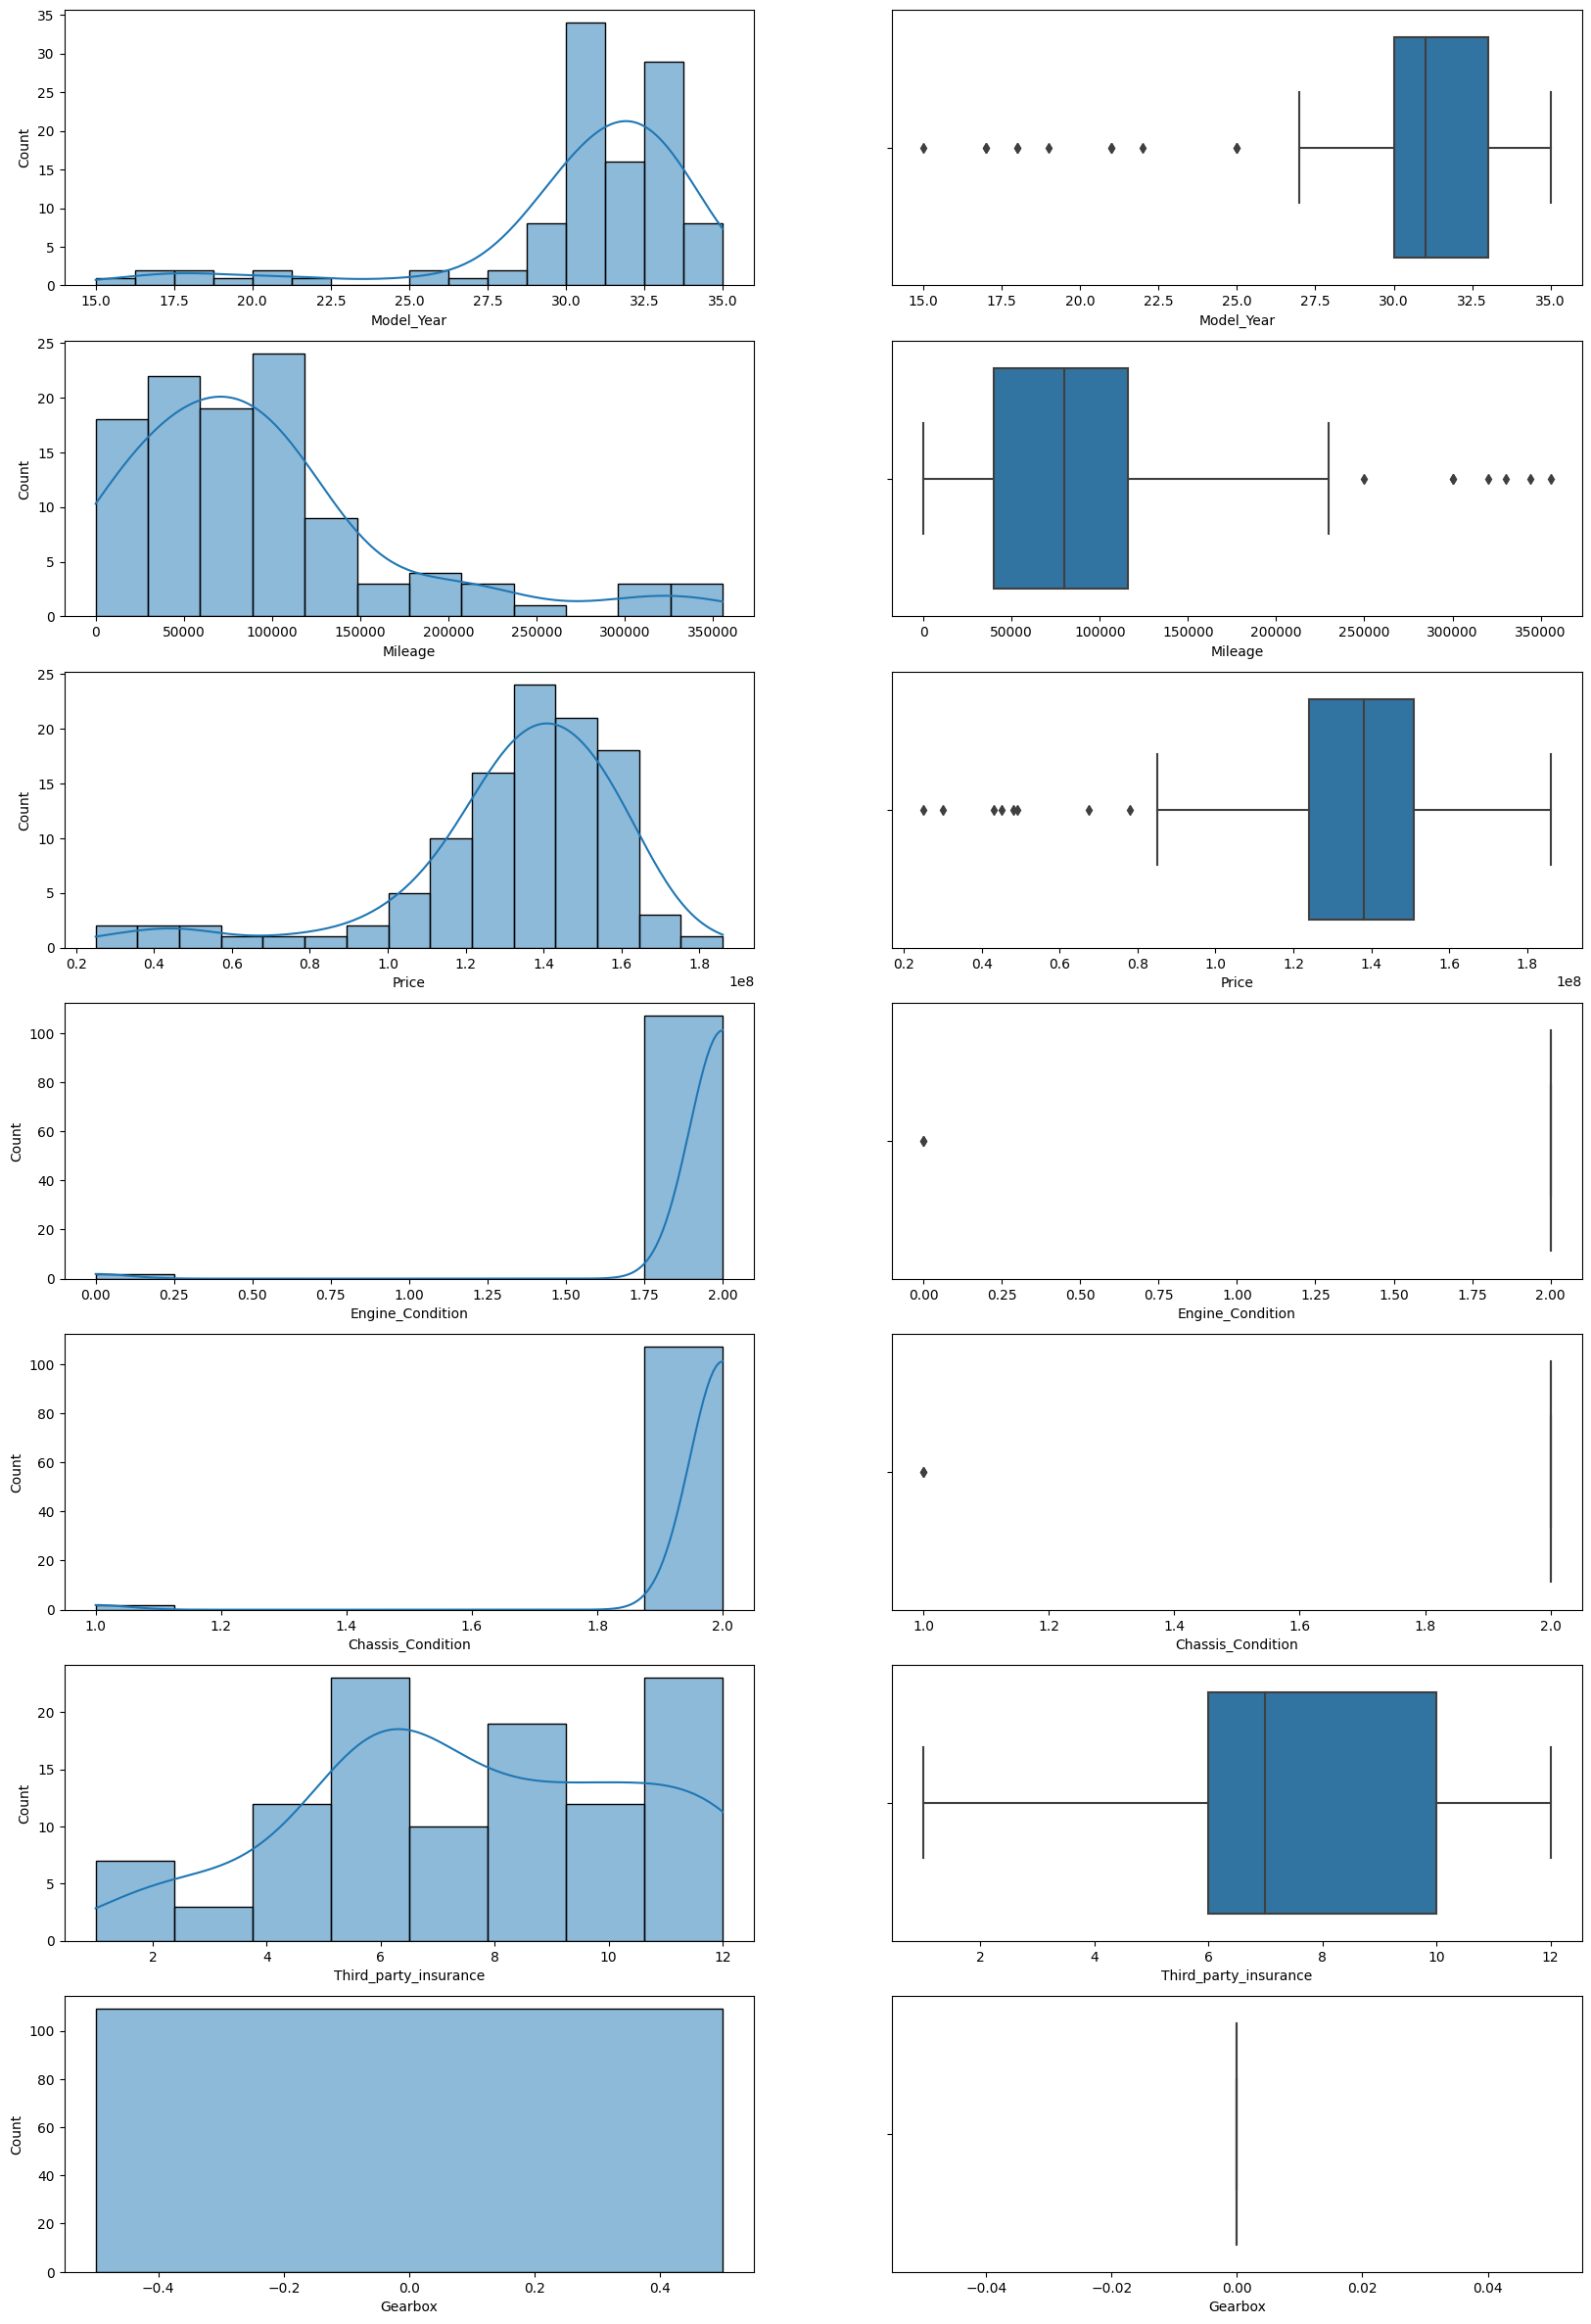

In [26]:
fig, axes = plt.subplots(7, 2, figsize=(20,30))
cols = df_small.columns
for i in range(7):
    sns.histplot(df_small[cols[i]], kde=True, ax=axes[i, 0])
    sns.boxplot(x=df_small[cols[i]], ax=axes[i, 1])

Print the correlation coefficients matrix **(P3-3: 1 points)**

In [27]:
df_small.corr()

,Model_Year,Mileage,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox
Model_Year,1.000000,-0.736262,0.937551,0.185410,0.048395,0.029825,NaN
Mileage,-0.736262,1.000000,-0.738927,-0.203812,-0.156697,-0.084053,NaN
Price,0.937551,-0.738927,1.000000,0.204129,0.106977,0.091359,NaN
Engine_Condition,0.185410,-0.203812,0.204129,1.000000,-0.018692,-0.131603,NaN
Chassis_Condition,0.048395,-0.156697,0.106977,-0.018692,1.000000,0.053789,NaN
Third_party_insurance,0.029825,-0.084053,0.091359,-0.131603,0.053789,1.000000,NaN
Gearbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot `Price` plot according to`Mileage` using `seaborn.scatterplot` **(P3-4: 1 points)**

<Axes: xlabel='Mileage', ylabel='Price'>

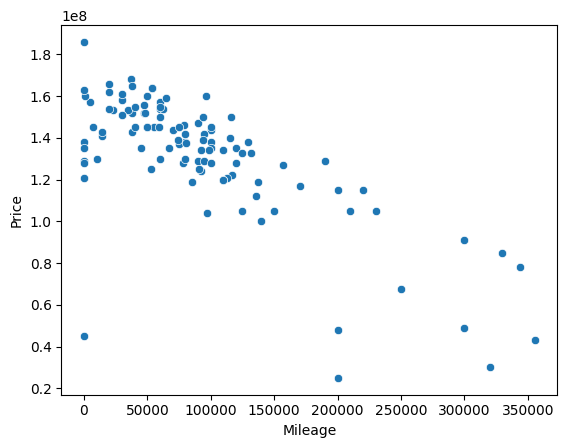

In [28]:
sns.scatterplot(x='Mileage', y='Price', data=df_small)

Plot `Model_Year` plot according to`Gearbox` using `seaborn.lineplot` **(P3-5: 1 points)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Model_Year', ylabel='Price'>

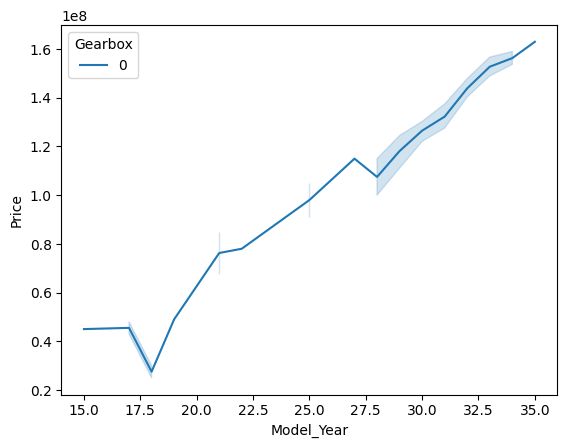

In [29]:
sns.lineplot(x='Model_Year', y='Price',hue='Gearbox', data=df_small)

It's clear that some columns are more correlated with the price. In practice, when dealing with many columns, we might set aside the least correlated ones and focus on the rest. However, here we will continue with all columns of 'df'.

## Phase 4: Training (P4: 55 points)

### Sec 1: Preparing features and Targets (P4-Sec1: 10 points)

Extract only the features from the dataframe by removing the target column ("Price").
Note: Do not remove the previous dataframe. **(P4-1-1: 2 points)**

In [30]:
features = df_small.drop('Price', axis=1, inplace=False).copy()

Convert the new dataframe into a numpy array. **(P4-1-2: 1 points)**

In [31]:
x = features.to_numpy()

Get the target column from the previous dataframe and convert it to another numpy array named y **(P4-1-3: 1 points)**

In [32]:
y = df_small.Price.to_numpy()

Split the dataset into two parts such that the training set (denoted a`x_train` and `y_train`), contains 80% of the samples. **(P4-1-4: 3 points)**

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

Fit MinMaxScaler on the training data and apply it to the entire dataset to normalize all columns of data into the range [0-1]. **(P4-1-5: 4 points)**

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
scaler1 = MinMaxScaler()
scaler1.fit(y_train.reshape(-1,1))
x_train = scaler.transform(x_train)
y_train = scaler1.transform(y_train.reshape(-1,1))
x_test = scaler.transform(x_test)
y_test = scaler1.transform(y_test.reshape(-1,1))

### Sec 2: Linear Regression, Lasso and Ridge Regression from Scratch (P4-Sec2: 40 points)

In [50]:
import numpy as np

class CustomLinearRegression:
    def __init__(self, regularization=None, alpha=1.0):
        '''
        Initialize the CustomLinearRegression object.

        Parameters:
        regularization (str or None): Type of regularization. Can be None, 'lasso', or 'ridge'.
        alpha (float): Regularization strength parameter.
        '''
        self.regularization = regularization
        self.alpha = alpha
        self.weights = None

    def fit(self, X, y):
        '''
        Fit the linear regression model to the training data.

        Parameters:
        X (array-like): Training input data.
        y (array-like): Target values.

        Returns:
        None
        '''
        # Add bias term to input data
        X = np.insert(X, 0, 1, axis=1)
        y = y.reshape((-1, 1))
        
        if self.regularization is None:
            
            # Solve for weights without regularization
            self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y
            
        elif self.regularization == "lasso":
            
            # Solve for weights with Lasso regularization
            self.weights = self._lasso_regression(X, y)
            
        elif self.regularization == "ridge":
            
            # Solve for weights with Ridge regularization
            self.weights = self._ridge_regression(X, y)
            
        else:
            raise ValueError("Invalid regularization type. Please choose None, 'lasso', or 'ridge'.")

    def predict(self, X):
        '''
        Make predictions using the trained model.

        Parameters:
        X (array-like): Input data for prediction.

        Returns:
        array-like: Predicted target values.
        '''
        if self.weights is None:
            raise ValueError("Model has not been fitted yet. Please call the fit method first.")
        
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.weights
    
    def _lasso_term(self, weights):
        '''
        Compute the Lasso regularization term.

        Parameters:
        weights (array-like): Model weights.

        Returns:
        float: Lasso regularization term.
        '''
        return self.alpha * np.sum(np.abs(weights[1:]))

    def _lasso_derivative(self, weights):
        '''
        Compute the derivative of the Lasso regularization term.

        Parameters:
        weights (array-like): Model weights.

        Returns:
        array-like: Derivative of the Lasso regularization term.
        '''
        derivative = np.zeros_like(weights)
        derivative[1:] = self.alpha * np.sign(weights[1:])
        return derivative
    
    def _lasso_regression(self, X, y):
        '''
        Perform Lasso regression to find model weights.

        Parameters:
        X (array-like): Input data.
        y (array-like): Target values.

        Returns:
        array-like: Model weights.
        '''
        X = X - X.mean()
        
        n,d = X.shape
        w = np.random.randn(d, 1)
        num_iterations = 500
        lr = 0.2
        
        for it in range(num_iterations):
            y_pred = np.dot(X, w)
            loss = (1 / (2*n)) * np.sum(np.square(y_pred - y)) + self._lasso_term(w)
            dw = (1/n) * np.dot(X.T, (y_pred - y)) + self._lasso_derivative(w)
            w = w - lr * dw
        return w
            
    def _ridge_regression(self, X, y):
        '''
        Perform Ridge regression to find model weights.

        Parameters:
        X (array-like): Input data.
        y (array-like): Target values.

        Returns:
        array-like: Model weights.
        '''
        I = np.eye(X.shape[1])
        return np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y

### Sec 3: Moddel Fitting (P4-Sec3: 5 points)

Fit 3 linear regressor to the data.
- Your implemented linear regression.
- Your implemented ridge.
- Your implemented lasso.

**(P4-3-1: 3 points)**

In [51]:
my_regzrs = [
    ("Linear Regression", CustomLinearRegression()),
    ("Ridge", CustomLinearRegression(regularization="ridge")),
    ("Lasso", CustomLinearRegression(regularization="lasso"))
]
my_y_pred_test = []
my_y_pred_train = []
for name, my_regressor in my_regzrs:
    my_regressor.fit(x_train, y_train)
    y_pred_test = my_regressor.predict(x_test)
    my_y_pred_test.append(y_pred_test)
    y_pred_train = my_regressor.predict(x_train)
    my_y_pred_train.append(y_pred_train)
    mse = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
    print(f"{name} MSE:\t {mse:.2f}")

Linear Regression MSE:	 0.01
Ridge MSE:	 0.00
Lasso MSE:	 2.60


Fit 3 linear regressor to the data.
- sklearn linear regression.
- sklearn lasso.
- sklearn ridge.

**(P4-3-2: 2 points)**

In [52]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

sk_regzrs = [("Linear Regression", LinearRegression(fit_intercept=False)), ("Ridge", Ridge()), ("Lasso", Lasso())]
sk_y_pred_test = []
sk_y_pred_train = []
for name, sk_regressor in sk_regzrs:
    sk_regressor.fit(x_train, y_train)
    y_pred_test = sk_regressor.predict(x_test)
    sk_y_pred_test.append(y_pred_test)
    y_pred_train = sk_regressor.predict(x_train)
    sk_y_pred_train.append(y_pred_train)
    mse = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
    print(f"{name} MSE:\t {mse:.2f}")

Linear Regression MSE:	 0.00
Ridge MSE:	 0.00
Lasso MSE:	 0.03


## Phase 5: Evaluation (P5: 15 points)

### Sec 1: RMSE (P5-Sec1: 10 points)

Calculate the root mean squared error of your three models on the `train` data. **(P5-1-1: 3 points)**

In [53]:
from sklearn.metrics import mean_squared_error
names = ['Linear Regression', 'Ridge', 'Lasso']
i=0
for y_pred in my_y_pred_train:
    rms = np.sqrt(mean_squared_error(y_train, y_pred))
    print(f"{names[i]} MSE:\t {rms:.2f}")
    i += 1

Linear Regression MSE:	 0.06
Ridge MSE:	 0.07
Lasso MSE:	 1.62


Calculate the root mean squared error of sklearn's three models on the `train` data. **(P5-1-2: 2 points)**

In [54]:
i=0
for y_pred in sk_y_pred_train:
    rms = np.sqrt(mean_squared_error(y_train, y_pred))
    print(f"{names[i]} MSE:\t {rms:.2f}")
    i += 1

Linear Regression MSE:	 0.06
Ridge MSE:	 0.07
Lasso MSE:	 0.19


Calculate the root mean squared error of your three models on the `test` data. **(P5-1-3: 3 points)**

In [55]:
i=0
for y_pred in my_y_pred_test:
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{names[i]} MSE:\t {rms:.2f}")
    i += 1

Linear Regression MSE:	 0.07
Ridge MSE:	 0.07
Lasso MSE:	 1.61


Calculate the root mean squared error of sklearn's three models on the `test` data. **(P5-1-4: 2 points)**

In [56]:
i=0
for y_pred in sk_y_pred_test:
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{names[i]} MSE:\t {rms:.2f}")
    i += 1

Linear Regression MSE:	 0.07
Ridge MSE:	 0.07
Lasso MSE:	 0.16


### Sec 2: Lasso (P5-Sec2: 5 points)

Get trained weights of scikit-learn's Lasso model. **(P5-2-1: 3 points)**

In [57]:
weights = sk_regzrs[2][1].coef_

Sort and print the weights. **(P5-2-2: 2 points)**

In [58]:
sorted(weights)

[0.0, -0.0, 0.0, 0.0, 0.0, 0.0]